# Dataset Analysis 4: Feature engineering

In [2]:
import pandas as pd
import numpy as np
from datasets import *
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Therapy Started to First Visit time delta

In [2]:
dogs = load_df_dogs_2016(dropColumns=dropNonNumeric+dropDates+dropIrrelevant+dropDead, NApolicy='normal', censoringPolicy='max', newFeats=True)
dogs.head(5)

,IP Gravity,Vrig Tric,Age,Survival time,Therapy Category,Antiaritmico,Weight (Kg),Asx/Ao,E,E/A,FE %,FS %,EDVI,ESVI,Allo diast,Allo sist,Therapy to visit
0,0,0.0,10.347945,2172,2,0,5.25,2.495146,1.15,0.974576,70.0,37.0,78.686406,23.746696,1.584502,0.988779,0
1,0,0.0,15.205479,341,3,0,6.00,1.609023,1.50,1.470588,83.0,51.0,130.584237,23.876482,1.942761,0.986143,0
2,0,0.0,15.769863,117,3,0,3.20,2.504202,1.87,2.077778,91.0,62.0,180.348219,16.221999,2.213868,0.841053,0
3,0,0.0,13.542466,93,4,1,26.50,3.071429,2.28,2.850000,75.0,44.0,234.165258,40.151793,2.094778,1.163766,0
4,0,0.0,10.720548,2172,3,0,11.00,2.536000,0.75,0.862069,69.0,38.0,139.835879,43.886680,1.981413,1.230353,182


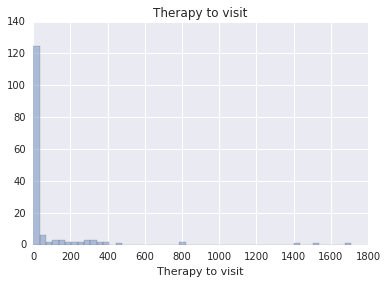

In [3]:
plt.title("Therapy to visit")
sns.distplot(dogs["Therapy to visit"], kde=False)
plt.show()

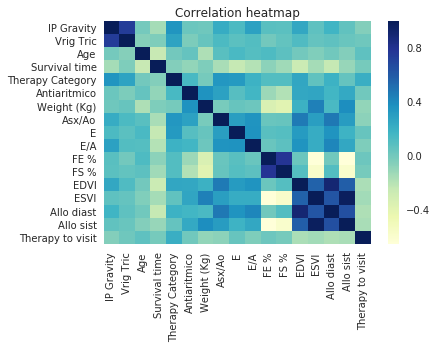

In [4]:
plt.title("Correlation heatmap")
sns.heatmap(dogs.corr(), cmap="YlGnBu")
plt.show()

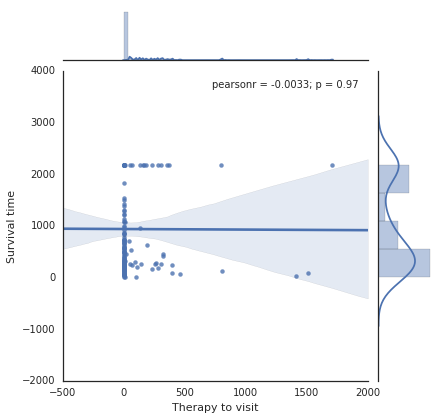

In [5]:
with sns.axes_style('white'):
    sns.jointplot("Therapy to visit", "Survival time", dogs, kind='reg')
    plt.show()

In [20]:
dogs = load_skl_dogs_2016(NApolicy='normal', censoringPolicy='max', newFeats=True, scaler=StandardScaler())

print("SVR with grid search model selection\n")

X, y = dogs.data, dogs.target
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/6)

param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'degree': [1,2,3], 'coef0': [-100, -10, -1, 0, 1, 10, 100], 'kernel': ['poly']}
 ]

svreg = GridSearchCV(svm.SVR(), param_grid, cv=5, n_jobs=4)
svreg.fit(X_Train, y_Train)

print("Best parameters set found on development set:")
print(svreg.best_params_)
print("Test score: %f" % svreg.score(X_Test,y_Test))

SVR with grid search model selection

Best parameters set found on development set:
{'coef0': -10, 'C': 0.5, 'kernel': 'poly', 'degree': 3, 'epsilon': 5, 'gamma': 0.1}
Test score: -0.226310


## Removing highly correlated features

Removing **Vrig tric**, **FS %**, **ESVI**, **Allo diast** e **Allo sist**

In [7]:
dogs = load_df_dogs_2016(dropColumns=dropNonNumeric+dropDates+dropIrrelevant+dropDead+["Vrig Tric", "FS %", "ESVI", "Allo diast", "Allo sist"], NApolicy='normal', censoringPolicy='max', newFeats=True)
dogs.head(5)

,IP Gravity,Age,Survival time,Therapy Category,Antiaritmico,Weight (Kg),Asx/Ao,E,E/A,FE %,EDVI,Therapy to visit
0,0,10.347945,2172,2,0,5.25,2.495146,1.15,0.974576,70.0,78.686406,0
1,0,15.205479,341,3,0,6.00,1.609023,1.50,1.470588,83.0,130.584237,0
2,0,15.769863,117,3,0,3.20,2.504202,1.87,2.077778,91.0,180.348219,0
3,0,13.542466,93,4,1,26.50,3.071429,2.28,2.850000,75.0,234.165258,0
4,0,10.720548,2172,3,0,11.00,2.536000,0.75,0.862069,69.0,139.835879,182


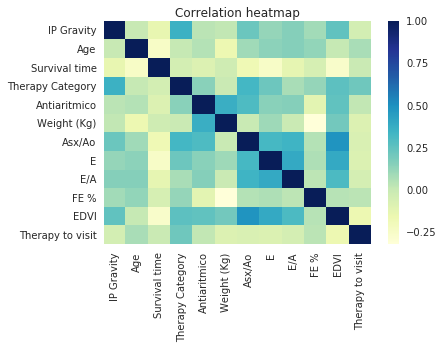

In [8]:
plt.title("Correlation heatmap")
sns.heatmap(dogs.corr(), cmap="YlGnBu")
plt.show()

In [21]:
dogs = load_skl_dogs_2016(dropColumns=dropNonNumeric+dropDates+dropIrrelevant+dropDead+["Vrig Tric", "FS %", "ESVI", "Allo diast", "Allo sist"], NApolicy='normal', censoringPolicy='max', newFeats=True, scaler=StandardScaler())

print("SVR with grid search model selection\n")

X, y = dogs.data, dogs.target
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/6)

param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'degree': [1,2,3], 'coef0': [-100, -10, -1, 0, 1, 10, 100], 'kernel': ['poly']}
 ]

svreg = GridSearchCV(svm.SVR(), param_grid, cv=5, n_jobs=4)
svreg.fit(X_Train, y_Train)

print("Best parameters set found on development set:")
print(svreg.best_params_)
print("Test score: %f" % svreg.score(X_Test,y_Test))

SVR with grid search model selection

Best parameters set found on development set:
{'coef0': -100, 'C': 8, 'kernel': 'poly', 'degree': 3, 'epsilon': 0.05, 'gamma': 0.01}
Test score: -0.276400


Removing **Vrig tric**, **FE %**, **EDVI**, **ESVI**, **Allo sist**

In [10]:
dogs = load_df_dogs_2016(dropColumns=dropNonNumeric+dropDates+dropIrrelevant+dropDead+["Vrig Tric", "FE %", "EDVI", "ESVI", "Allo sist"], NApolicy='normal', censoringPolicy='max', newFeats=True)
dogs.head(5)

,IP Gravity,Age,Survival time,Therapy Category,Antiaritmico,Weight (Kg),Asx/Ao,E,E/A,FS %,Allo diast,Therapy to visit
0,0,10.347945,2172,2,0,5.25,2.495146,1.15,0.974576,37.0,1.584502,0
1,0,15.205479,341,3,0,6.00,1.609023,1.50,1.470588,51.0,1.942761,0
2,0,15.769863,117,3,0,3.20,2.504202,1.87,2.077778,62.0,2.213868,0
3,0,13.542466,93,4,1,26.50,3.071429,2.28,2.850000,44.0,2.094778,0
4,0,10.720548,2172,3,0,11.00,2.536000,0.75,0.862069,38.0,1.981413,182


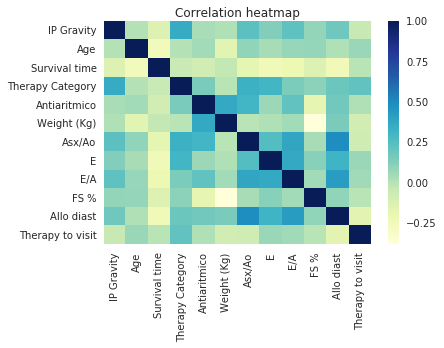

In [11]:
plt.title("Correlation heatmap")
sns.heatmap(dogs.corr(), cmap="YlGnBu")
plt.show()

In [4]:
dogs = load_skl_dogs_2016(dropColumns=dropNonNumeric+dropDates+dropIrrelevant+dropDead+["Vrig Tric", "FE %", "EDVI", "ESVI", "Allo sist"], NApolicy='normal', censoringPolicy='max', newFeats=True, scaler=StandardScaler())

print("SVR with grid search model selection\n")

X, y = dogs.data, dogs.target
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/6)

param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'degree': [1,2,3], 'coef0': [-100, -10, -1, 0, 1, 10, 100], 'kernel': ['poly']}
 ]

svreg = GridSearchCV(svm.SVR(), param_grid, cv=6, n_jobs=4)
svreg.fit(X_Train, y_Train)

print("Best parameters set found on development set:")
print(svreg.best_params_)
print("Test score: %f" % svreg.score(X_Test,y_Test))

SVR with grid search model selection

Best parameters set found on development set:
{'kernel': 'poly', 'coef0': -10, 'C': 16, 'degree': 3, 'gamma': 0.001, 'epsilon': 0.0001}
Test score: -0.034097


## Checking correlation between "IP Gravity" and "Vrig Tric" if zeroes are removed

In [15]:
dogs = load_df_dogs_2016()[["IP Gravity", "Vrig Tric"]]
dogs.shape

(161, 2)

In [16]:
dogs = dogs[(dogs["IP Gravity"]!=0) & (dogs["Vrig Tric"]!=0)]
dogs.shape

(58, 2)

In [18]:
dogs.corr()

,IP Gravity,Vrig Tric
IP Gravity,1.000000,0.933448
Vrig Tric,0.933448,1.000000


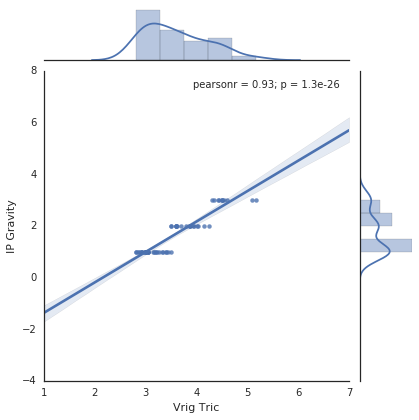

In [19]:
with sns.axes_style('white'):
    sns.jointplot("Vrig Tric", "IP Gravity", dogs, kind='reg')
    plt.show()

IP gravity is calculated as a discretization of Vrig Tric